# 🧪 Laboratorio de Esteganografía con OpenCV

**Curso:** CY-203 Hackeo Ético  
**Tema:** Ocultamiento de imágenes usando LSB (Least Significant Bit)  
**Objetivo:** Ocultar una imagen dentro de otra utilizando manipulación de bits con OpenCV.

In [1]:
# ✅ Requisitos
%pip install opencv-python matplotlib numpy


[notice] A new release of pip available: 22.2.2 -> 25.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## 1. Importar librerías y cargar imágenes

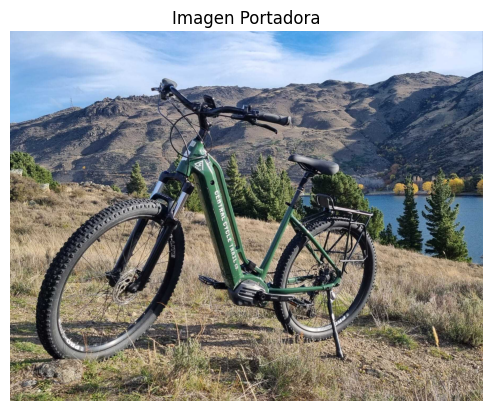

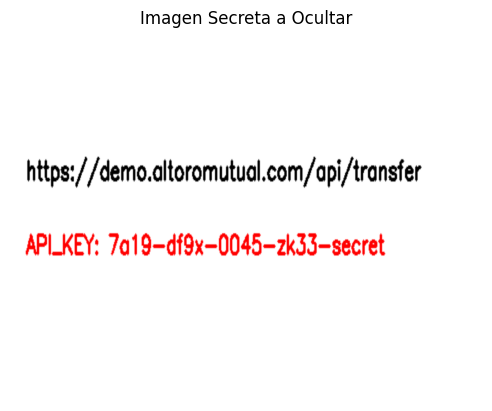

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show(img, title="Imagen"):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Cargar imagen portada y mensaje
cover = cv2.imread('cover.png')
secret = cv2.imread('secret.png')

# Redimensionar imagen secreta al tamaño de la portada
secret = cv2.resize(secret, (cover.shape[1], cover.shape[0]))

show(cover, "Imagen Portadora")
show(secret, "Imagen Secreta a Ocultar")

## 2. Preparar las imágenes para ocultamiento
Usamos los 4 bits más significativos de la imagen portadora y los 4 más significativos del mensaje secreto.

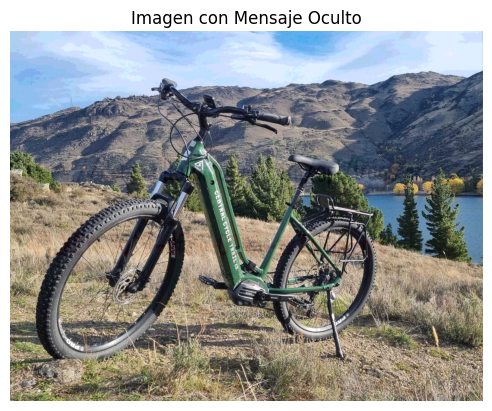

True

In [6]:
# Convertimos los valores a 8 bits (0-255)
cover_bits = (cover >> 4) << 4         # Limpiamos los 4 bits menos significativos
secret_bits = secret >> 4              # Tomamos los 4 bits más significativos

# Ocultamos la imagen
stego = cover_bits | secret_bits

show(stego, "Imagen con Mensaje Oculto")
cv2.imwrite("stego_result.png", stego)

## 3. Extraer el mensaje oculto desde la imagen esteganográfica

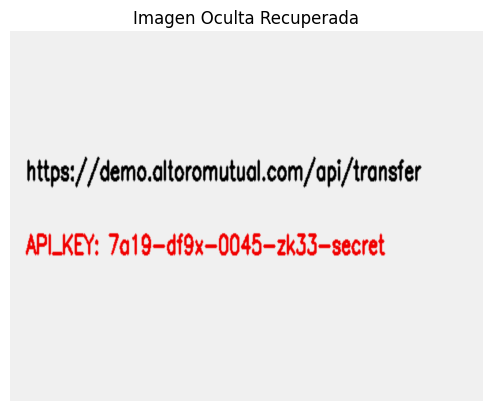

True

In [7]:
# Extraemos los 4 bits menos significativos (donde está el mensaje)
extracted = (stego & 0b00001111) << 4  # Restauramos a 8 bits
show(extracted, "Imagen Oculta Recuperada")
cv2.imwrite("recovered_secret.png", extracted)

## 4. Conclusión
Este laboratorio demuestra cómo la manipulación directa de bits permite ocultar información visual en otra imagen sin alterar notablemente la portada.
- Esta técnica es **vulnerable** a compresión y filtrado.
- No requiere clave secreta: es una forma de **esteganografía pura**.
- Puede extenderse a múltiples capas (8 bits, canales individuales, etc.).

**Aplicación real:** Espías, periodistas, activistas o malware podrían usar este método para ocultar datos en imágenes aparentemente inocuas.